### Required packages
pandas
NumPy
requests
tweepy
json

In [1]:
import pandas as pd
import requests
import tweepy
import json
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns

## Gathering Data

### 1. Twitter Archived Enhanced Data

In [2]:
Archived_Enhanced_df = pd.read_csv('/content/drive/MyDrive/twitter-archive-enhanced (1).csv')
Archived_Enhanced_df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [3]:
Archived_Enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### 2. Image Predictions Data

In [4]:
# Make directory if it doesn't already exist
folder_name = 'new_folder'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [6]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [7]:
# Using requests library to download tsv file hosted on udacity server
# url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
# response = requests.get(url)
with open('/content/new_folder/image-predictions.tsv', 'wb') as file:
    file.write(response.content)
Predictions_data_df= pd.read_csv('/content/new_folder/image-predictions.tsv', sep='\t')

In [8]:
Predictions_data_df.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [9]:
Predictions_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [ ]:
# url='https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
# response = requests.get(url)
# with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
#     file.write(response.content)

### 3.Query the Twitter API

In [ ]:
import glob
import pandas as pd

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import time

In [ ]:
import tweepy

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [ ]:
# list of tweet ids from enhanced data set
df_tweet_ids = Archived_Enhanced_df['tweet_id']

In [ ]:
# creating a list for tweets with exceptions/errors 
tweets_error_list = []

# List of tweets
df_tweets = []

# start time of execution
start = time.time()

# For loop which will add each available tweet json to df_list
for tweet_id in df_tweet_ids:
    try:
        tweet = api.get_status(tweet_id, tweet_mode= 'extended')._json 
        
        favorites = tweet['favorite_count'] # number of favorites for the tweet
        retweets = tweet['retweet_count'] # number of retweets
        user_followers = tweet['user']['followers_count'] # number of followers of the user who tweeted
        user_favourites = tweet['user']['favourites_count'] # number of favourites for the user who tweeted
        date_time = tweet['created_at'] # the timestamp i.e. date and time of creation of the tweet
        
        df_tweets.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        tweets_error_list.append(tweet_id)
        
# end time for excution
end = time.time()

#printing time for execution
print("Total time taken for execution", end - start)

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 _ [{'code': 144, 'message': 'No status found with that ID.'}]
856330835276025856 _ [{'code': 34, 'message': 'Sorry, that page does not exist.'}]
851953902622658560 _ [{'code': 144, 'message': 'No status found with that ID.'}]
851861385021730816 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 _ [{'co

Rate limit reached. Sleeping for: 799


754011816964026368 _ [{'code': 144, 'message': 'No status found with that ID.'}]
680055455951884288 _ [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 798


Total time taken for execution 1871.7924304008484


In [ ]:
# total tweets received from api
print("The lengh of the result", len(df_tweets))

# The tweet_id of the errors received from api
print("The lengh of the errors", len(tweets_error_list))

The lengh of the result 2327
The lengh of the errors 29


In [ ]:
# creating DataFrames
df_tweets_json = pd.DataFrame(df_tweets, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])
# saving the dataFrame to file
df_tweets_json.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [ ]:
# Read the saved tweet_json.txt file into a dataframe
df_api_data = pd.read_csv('tweet_json.txt', encoding = 'utf-8')

In [ ]:
df_api_data.head()

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,33839,7018,9271961,146769,2017-08-01 16:23:56+00:00
1,892177421306343426,29354,5303,9271961,146769,2017-08-01 00:17:27+00:00
2,891815181378084864,22072,3486,9271961,146769,2017-07-31 00:18:03+00:00
3,891689557279858688,36968,7230,9271961,146769,2017-07-30 15:58:51+00:00
4,891327558926688256,35343,7770,9271961,146769,2017-07-29 16:00:24+00:00


In [ ]:
df_api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2327 non-null   int64 
 1   favorites        2327 non-null   int64 
 2   retweets         2327 non-null   int64 
 3   user_followers   2327 non-null   int64 
 4   user_favourites  2327 non-null   int64 
 5   date_time        2327 non-null   object
dtypes: int64(5), object(1)
memory usage: 109.2+ KB


In [ ]:
# save dataframe
df_api_data.to_csv('df_tweets.csv')

In [10]:
Twitter_api_df = pd.read_csv("/content/drive/MyDrive/df_tweets.csv")
Twitter_api_df.head(5)

,Unnamed: 0,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,0,892420643555336193,33824,7018,9272009,146769,2017-08-01 16:23:56+00:00
1,1,892177421306343426,29340,5303,9272009,146769,2017-08-01 00:17:27+00:00
2,2,891815181378084864,22067,3486,9272009,146769,2017-07-31 00:18:03+00:00
3,3,891689557279858688,36932,7223,9272009,146769,2017-07-30 15:58:51+00:00
4,4,891327558926688256,35308,7770,9272009,146769,2017-07-29 16:00:24+00:00


## Data Assessment
### Visual Assessment

#### Quality Issues

$\bullet$Archive
<ol>
<li>column "expanded URLs", has missing values, duplicates and unnecessary links
<li>The column with dog names have missing values
<li> text column includes rating, dog names, IG names and URLs
</ol>

$\bullet$Json txt
<ul>
<li>Since it has the same tweet_id column like df_1, then the columns could be merged with the df_1

### Structural Issues
#### Archive
<ol>
<li>the columns doggo, floofer, pupper and puppo could be collapsed into a dogtype column.
</ol>

#### Predictions
<ol>
<li>P1, P2, P3 columns could be merged into single columns.
<li>P1_conf, P2_conf, P3_conf columns could also be merged into single columns. 



### Programatic Assessment

#### 1. Tweet enhanced Data

In [11]:
Archived_Enhanced_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
Archived_Enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
Archived_Enhanced_df.tweet_id.nunique()

2356

In [14]:
Archived_Enhanced_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [15]:
# count numbers of values in columns doggo, floofer, pupper and puppo
(Archived_Enhanced_df.loc[:, 'doggo':'puppo'] != 'None').sum()

doggo       97
floofer     10
pupper     257
puppo       30
dtype: int64

In [16]:
# check whether all dog names are filled
Archived_Enhanced_df.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [17]:
Archived_Enhanced_df.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [18]:
Archived_Enhanced_df.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [19]:
# check sources
Archived_Enhanced_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

#### 2. Prediction table

In [20]:
Predictions_data_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [21]:
Predictions_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
# count null values
Predictions_data_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

#### 3.Twitter api data

In [23]:
Twitter_api_df.sample(15)

,Unnamed: 0,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
1667,1667,681261549936340994,1336,237,9272028,146769,2015-12-27 23:53:05+00:00
83,83,876484053909872640,16573,2004,9272009,146769,2017-06-18 16:57:37+00:00
471,471,813910438903693312,8844,1735,9272008,146769,2016-12-28 00:52:25+00:00
2283,2283,666776908487630848,305,150,9272036,146769,2015-11-18 00:36:17+00:00
1943,1943,673240798075449344,1278,618,9272036,146769,2015-12-05 20:41:29+00:00
1907,1907,673956914389192708,1752,840,9272036,146769,2015-12-07 20:07:04+00:00
421,421,819952236453363712,5018,1083,9272008,146769,2017-01-13 17:00:21+00:00
229,229,846514051647705089,41265,10413,9272009,146769,2017-03-28 00:07:32+00:00
524,524,805958939288408065,0,5023,9272008,146769,2016-12-06 02:15:59+00:00
1259,1259,708356463048204288,3310,1202,9272027,146769,2016-03-11 18:18:36+00:00


In [24]:
Twitter_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       2327 non-null   int64 
 1   tweet_id         2327 non-null   int64 
 2   favorites        2327 non-null   int64 
 3   retweets         2327 non-null   int64 
 4   user_followers   2327 non-null   int64 
 5   user_favourites  2327 non-null   int64 
 6   date_time        2327 non-null   object
dtypes: int64(6), object(1)
memory usage: 127.4+ KB


In [25]:
Twitter_api_df[Twitter_api_df.duplicated(['user_favourites'], keep=False)]

,Unnamed: 0,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,0,892420643555336193,33824,7018,9272009,146769,2017-08-01 16:23:56+00:00
1,1,892177421306343426,29340,5303,9272009,146769,2017-08-01 00:17:27+00:00
2,2,891815181378084864,22067,3486,9272009,146769,2017-07-31 00:18:03+00:00
3,3,891689557279858688,36932,7223,9272009,146769,2017-07-30 15:58:51+00:00
4,4,891327558926688256,35308,7770,9272009,146769,2017-07-29 16:00:24+00:00
...,...,...,...,...,...,...,...
2322,2322,666049248165822465,89,37,9272036,146769,2015-11-16 00:24:50+00:00
2323,2323,666044226329800704,246,115,9271617,146768,2015-11-16 00:04:52+00:00
2324,2324,666033412701032449,99,36,9272036,146769,2015-11-15 23:21:54+00:00
2325,2325,666029285002620928,112,39,9272036,146769,2015-11-15 23:05:30+00:00


## Quality Issues
#### Archived_enhanced_df
<ol>
<li>Timestamp and retweeted status timestamp should be datetime format and not object/string
<li> In_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should all be integer and not float.
<li> Missing data in most of the columns filled with NaN and None.
</ol>

### Twitter_api_df dataframe
<ol>
<li>datetime should be of datatime datatype instead of string

### Structural Issues

#### predictions_df dataframe
<ol>
<li>p1, p2 and p3 should be cmerged
<li>p1_conf, p2_conf and p3_conf columns should be merged
<li>p1_dog, p2_dog and p3_dog columns should be merged


### Data Cleaning

In [26]:
# copy dataframes for cleaning purposes
archive_clean = Archived_Enhanced_df.copy()
predictions_clean = Predictions_data_df.copy()
df_api_clean = Twitter_api_df.copy()

#### Define
Let make the entire 3 data into 1 table instead of 3. Thus we will be merging the 3 dataframes into one. And then we will have only 1 dataframe to clean and process.

#### Code

In [27]:
df_twitter_enhanced_clean = pd.merge(left=archive_clean,
                                 right=df_api_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [28]:
df_twitter_enhanced_clean = df_twitter_enhanced_clean.merge(predictions_clean, on='tweet_id', how='inner')

#### Testing

In [29]:
df_twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2057 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2057 non-null   object 
 4   source                      2057 non-null   object 
 5   text                        2057 non-null   object 
 6   retweeted_status_id         71 non-null     float64
 7   retweeted_status_user_id    71 non-null     float64
 8   retweeted_status_timestamp  71 non-null     object 
 9   expanded_urls               2057 non-null   object 
 10  rating_numerator            2057 non-null   int64  
 11  rating_denominator          2057 non-null   int64  
 12  name                        2057 non-null   object 
 13  doggo                       2057 

In [30]:
df_twitter_enhanced_clean = df_twitter_enhanced_clean[df_twitter_enhanced_clean.retweeted_status_id.isnull()]
df_twitter_enhanced_clean = df_twitter_enhanced_clean[df_twitter_enhanced_clean.retweeted_status_user_id.isnull()]
df_twitter_enhanced_clean = df_twitter_enhanced_clean[df_twitter_enhanced_clean.retweeted_status_timestamp.isnull()]

In [33]:
df_twitter_enhanced_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### Define
Clean the content of source column, make it more readable.

#### Code

In [34]:
df_twitter_enhanced_clean['source'] = df_twitter_enhanced_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

#### Testing

In [35]:
df_twitter_enhanced_clean['source'].value_counts()

Twitter for iPhone    1948
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

#### Define
Refine p1, p2 and p3 columns and confidence associated by combining.

#### Code

In [36]:
# store the true algo with it's level of confidence and if false put NaN as confidence
prediction = []
confidence = []

def get_prediction_confidence(dataframe):
    if dataframe['p1_dog'] == True:
        prediction.append(dataframe['p1'])
        confidence.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        prediction.append(dataframe['p2'])
        confidence.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        prediction.append(dataframe['p3'])
        confidence.append(dataframe['p3_conf'])
    else:
        prediction.append('NaN')
        confidence.append(0)

df_twitter_enhanced_clean.apply(get_prediction_confidence, axis=1)
df_twitter_enhanced_clean['prediction'] = prediction
df_twitter_enhanced_clean['confidence'] = confidence

In [37]:
# drop the not required columns of image prediction information
df_twitter_enhanced_clean = df_twitter_enhanced_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


#### Test

In [38]:
#check if 2 new columns have been added and not required columns have been dropped
df_twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2056
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1986 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1986 non-null   object 
 4   source                      1986 non-null   object 
 5   text                        1986 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1986 non-null   object 
 10  rating_numerator            1986 non-null   int64  
 11  rating_denominator          1986 non-null   int64  
 12  name                        1986 non-null   object 
 13  doggo                       1986 

#### Define
Define new column for life stage of dog by melting the 'doggo', 'floofer', 'pupper' and 'puppo' columns into one column life_stage

#### Code

In [39]:
melt_coumns = ['doggo', 'floofer', 'pupper', 'puppo']
stay_columns = [x for x in df_twitter_enhanced_clean.columns.tolist() if x not in melt_coumns]

# Melt the the columns into values
df_twitter_enhanced_clean = pd.melt(df_twitter_enhanced_clean, id_vars = stay_columns, value_vars = melt_coumns, 
                         var_name = 'stages', value_name = 'life_stage')

In [40]:
# Delete column 'stages'
df_twitter_enhanced_clean = df_twitter_enhanced_clean.drop('stages', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


#### Test

In [41]:
#check if doggo', 'floofer', 'pupper', 'puppo' have been dropped and new column 'life_stage' has been added.
df_twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7944 entries, 0 to 7943
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    7944 non-null   int64  
 1   in_reply_to_status_id       92 non-null     float64
 2   in_reply_to_user_id         92 non-null     float64
 3   timestamp                   7944 non-null   object 
 4   source                      7944 non-null   object 
 5   text                        7944 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               7944 non-null   object 
 10  rating_numerator            7944 non-null   int64  
 11  rating_denominator          7944 non-null   int64  
 12  name                        7944 non-null   object 
 13  Unnamed: 0                  7944 

In [42]:
# check all types in life_Stage column
df_twitter_enhanced_clean.life_stage.value_counts()

None       7628
pupper      212
doggo        73
puppo        23
floofer       8
Name: life_stage, dtype: int64

#### Define
 Get the correct dog gender from text column by filtering common phrases and assigning a gender. Using 'NaN' if no gender can be inferred from text

#### Code

In [43]:
# Loop on all the texts and check if it has one of pronouns of male or female; add that to list.

male_pronouns = ['He', 'he', 'Him','him', 'His','his', "he's","He's", 'himself','Himself']
female_pronouns = ['She', 'she', 'her', 'Her','hers', 'Hers','herself','Herself',"she's", "She's"]

gender = []

for text in df_twitter_enhanced_clean['text']:
    # Male
    if any(map(lambda v:v in male_pronouns, text.split())):
        gender.append('male')
    # Female
    elif any(map(lambda v:v in female_pronouns, text.split())):
        gender.append('female')
    # If group or not specified
    else:
        gender.append('None')

#add a new column for dog gender
df_twitter_enhanced_clean['dog_gender'] = gender

#### Test

In [44]:
# check the values in new column dog_gender
df_twitter_enhanced_clean.dog_gender.value_counts()

male      4012
None      2596
female    1336
Name: dog_gender, dtype: int64

#### Define
 Convert all the 'NaN' values in prediction column to 'None' type and 'NaN' in rating_numerator column to 0.

#### Code

In [45]:
df_twitter_enhanced_clean.loc[df_twitter_enhanced_clean['prediction'] == 'NaN', 'prediction'] = None
# df_twitter_enhanced_clean.loc[df_twitter_enhanced_clean['dog_gender'] == 'NaN', 'dog_gender'] = None
df_twitter_enhanced_clean.loc[df_twitter_enhanced_clean['rating_numerator'] == 'NaN', 'rating_numerator'] = 0

Test

In [46]:
df_twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7944 entries, 0 to 7943
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    7944 non-null   int64  
 1   in_reply_to_status_id       92 non-null     float64
 2   in_reply_to_user_id         92 non-null     float64
 3   timestamp                   7944 non-null   object 
 4   source                      7944 non-null   object 
 5   text                        7944 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               7944 non-null   object 
 10  rating_numerator            7944 non-null   int64  
 11  rating_denominator          7944 non-null   int64  
 12  name                        7944 non-null   object 
 13  Unnamed: 0                  7944 

#### Define
Drop all the columns that are no longer relevant to the data

#### Code

In [47]:
# Delete columns we don't need anymore
df_twitter_enhanced_clean = df_twitter_enhanced_clean.drop('retweeted_status_id', 1)
df_twitter_enhanced_clean = df_twitter_enhanced_clean.drop('retweeted_status_user_id', 1)
df_twitter_enhanced_clean = df_twitter_enhanced_clean.drop('retweeted_status_timestamp', 1)
df_twitter_enhanced_clean = df_twitter_enhanced_clean.drop('date_time', 1) 
df_twitter_enhanced_clean = df_twitter_enhanced_clean.drop('in_reply_to_status_id', 1)
df_twitter_enhanced_clean = df_twitter_enhanced_clean.drop('in_reply_to_user_id', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a futur

In [48]:
# Delete duplicated tweet_id
df_twitter_enhanced_clean = df_twitter_enhanced_clean.drop_duplicates()

# Delete tweets with no pictures
df_twitter_enhanced_clean = df_twitter_enhanced_clean.dropna(subset = ['jpg_url'])

#Delete dog_stage duplicates
df_twitter_enhanced_clean = df_twitter_enhanced_clean.sort_values('life_stage').drop_duplicates('tweet_id', keep = 'last')
# Delete the unnamed colunm
df_twitter_enhanced_clean.drop(df_twitter_enhanced_clean.columns[df_twitter_enhanced_clean.columns.str.contains('Unnamed',case = False)],axis = 1, inplace=True)

#### Test

In [49]:
df_twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 6764
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1986 non-null   int64  
 1   timestamp           1986 non-null   object 
 2   source              1986 non-null   object 
 3   text                1986 non-null   object 
 4   expanded_urls       1986 non-null   object 
 5   rating_numerator    1986 non-null   int64  
 6   rating_denominator  1986 non-null   int64  
 7   name                1986 non-null   object 
 8   favorites           1986 non-null   int64  
 9   retweets            1986 non-null   int64  
 10  user_followers      1986 non-null   int64  
 11  user_favourites     1986 non-null   int64  
 12  jpg_url             1986 non-null   object 
 13  prediction          1678 non-null   object 
 14  confidence          1986 non-null   float64
 15  life_stage          1986 non-null   object 
 16  dog_ge

#### Define
Correct all the wrong datatype by converting to the correct data type

#### Code

In [50]:
df_twitter_enhanced_clean['tweet_id'] = df_twitter_enhanced_clean['tweet_id'].astype(str)
df_twitter_enhanced_clean['timestamp'] = pd.to_datetime(df_twitter_enhanced_clean.timestamp)
df_twitter_enhanced_clean['source'] = df_twitter_enhanced_clean['source'].astype('category')
df_twitter_enhanced_clean['favorites'] = df_twitter_enhanced_clean['favorites'].astype(int)
df_twitter_enhanced_clean['retweets'] = df_twitter_enhanced_clean['retweets'].astype(int)
df_twitter_enhanced_clean['user_followers'] = df_twitter_enhanced_clean['user_followers'].astype(int)
df_twitter_enhanced_clean['life_stage'] = df_twitter_enhanced_clean['life_stage'].astype('category')
df_twitter_enhanced_clean['rating_numerator'] = df_twitter_enhanced_clean['rating_numerator'].astype(float)
df_twitter_enhanced_clean['rating_denominator'] = df_twitter_enhanced_clean['rating_denominator'].astype(float)
df_twitter_enhanced_clean['dog_gender'] = df_twitter_enhanced_clean['dog_gender'].astype('category')

#### Test

In [51]:
#Lets check the datatype of the variables
df_twitter_enhanced_clean.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                           category
text                               object
expanded_urls                      object
rating_numerator                  float64
rating_denominator                float64
name                               object
favorites                           int64
retweets                            int64
user_followers                      int64
user_favourites                     int64
jpg_url                            object
prediction                         object
confidence                        float64
life_stage                       category
dog_gender                       category
dtype: object

#### Re-assess for confirmation of the cleaning 

In [52]:
df_twitter_enhanced_clean.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,user_favourites,jpg_url,prediction,confidence,life_stage,dog_gender
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,33824,7018,9272009,146769,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,0.000000,None,male
1382,679862121895714818,2015-12-24 03:12:15+00:00,Twitter for iPhone,"""Dammit hooman I'm jus trynna lik the fler"" 11...",https://twitter.com/dog_rates/status/679862121...,11.0,10.0,None,2256,557,9272028,146769,https://pbs.twimg.com/media/CW9a_h1WwAApmAy.jpg,EntleBucher,0.523206,None,None
1381,679877062409191424,2015-12-24 04:11:37+00:00,Twitter for iPhone,Meet Penelope. She's a bacon frise. Total babe...,https://twitter.com/dog_rates/status/679877062...,5.0,10.0,Penelope,1804,582,9272028,146769,https://pbs.twimg.com/media/CW9olDsUsAA0XSf.jpg,None,0.000000,None,female
1380,680070545539371008,2015-12-24 17:00:27+00:00,TweetDeck,Say hello to Emmie. She's trapped in an orname...,https://twitter.com/dog_rates/status/680070545...,9.0,10.0,Emmie,2389,776,9272028,146769,https://pbs.twimg.com/media/CW-dU34WQAANBGy.jpg,Shih-Tzu,0.121811,None,female
1379,680085611152338944,2015-12-24 18:00:19+00:00,TweetDeck,This is by far the most coordinated series of ...,https://twitter.com/dog_rates/status/680085611...,12.0,10.0,by,11762,8165,9272028,146769,https://pbs.twimg.com/media/CXAiiHUWkAIN_28.jpg,None,0.000000,None,None


In [53]:
# We save the cleaned csv into our file
df_twitter_enhanced_clean.to_csv('twitter_enhanced_cleaned_data.csv', encoding = 'utf-8', index=False)

In [54]:
# Let's access the saved cleaned twitter enhaced data
df_twitter_enhanced_clean = pd.read_csv('/content/twitter_enhanced_cleaned_data.csv')
df_twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1986 non-null   int64  
 1   timestamp           1986 non-null   object 
 2   source              1986 non-null   object 
 3   text                1986 non-null   object 
 4   expanded_urls       1986 non-null   object 
 5   rating_numerator    1986 non-null   float64
 6   rating_denominator  1986 non-null   float64
 7   name                1986 non-null   object 
 8   favorites           1986 non-null   int64  
 9   retweets            1986 non-null   int64  
 10  user_followers      1986 non-null   int64  
 11  user_favourites     1986 non-null   int64  
 12  jpg_url             1986 non-null   object 
 13  prediction          1678 non-null   object 
 14  confidence          1986 non-null   float64
 15  life_stage          1986 non-null   object 
 16  dog_ge

## Analysis and Visualization

In [55]:
# load master data frame
df_twitter_enhanced_clean = pd.read_csv('/content/twitter_enhanced_cleaned_data.csv')


In [56]:
df_twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1986 non-null   int64  
 1   timestamp           1986 non-null   object 
 2   source              1986 non-null   object 
 3   text                1986 non-null   object 
 4   expanded_urls       1986 non-null   object 
 5   rating_numerator    1986 non-null   float64
 6   rating_denominator  1986 non-null   float64
 7   name                1986 non-null   object 
 8   favorites           1986 non-null   int64  
 9   retweets            1986 non-null   int64  
 10  user_followers      1986 non-null   int64  
 11  user_favourites     1986 non-null   int64  
 12  jpg_url             1986 non-null   object 
 13  prediction          1678 non-null   object 
 14  confidence          1986 non-null   float64
 15  life_stage          1986 non-null   object 
 16  dog_ge

In [57]:
# change timestamp to datetime
df_twitter_enhanced_clean.timestamp = pd.to_datetime(df_twitter_enhanced_clean.timestamp, errors='coerce')

In [58]:
df_twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1986 non-null   int64              
 1   timestamp           1986 non-null   datetime64[ns, UTC]
 2   source              1986 non-null   object             
 3   text                1986 non-null   object             
 4   expanded_urls       1986 non-null   object             
 5   rating_numerator    1986 non-null   float64            
 6   rating_denominator  1986 non-null   float64            
 7   name                1986 non-null   object             
 8   favorites           1986 non-null   int64              
 9   retweets            1986 non-null   int64              
 10  user_followers      1986 non-null   int64              
 11  user_favourites     1986 non-null   int64              
 12  jpg_url             1986 non-null 

In [59]:
count_dogs =df_twitter_enhanced_clean.groupby('life_stage')['tweet_id'].count()
count_dogs

life_stage
None       1681
doggo        62
floofer       8
pupper      212
puppo        23
Name: tweet_id, dtype: int64

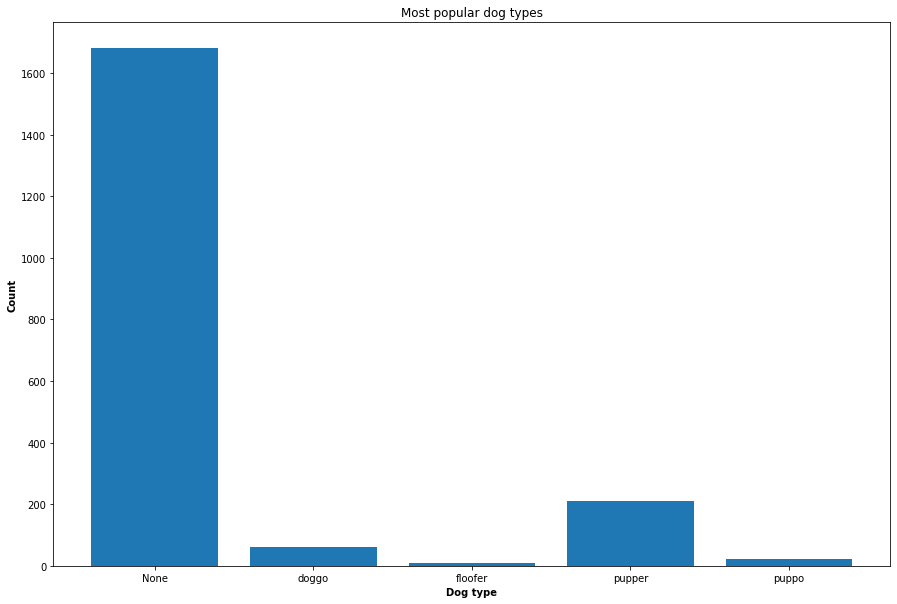

In [60]:
plt.subplots(figsize=(15, 10))
plt.bar([1, 2, 3, 4, 5], count_dogs, tick_label=['None',  'doggo', 'floofer', 'pupper', 
                                                       'puppo'])
plt.title('Most popular dog types')
plt.xlabel('Dog type', weight='bold')
plt.ylabel('Count', weight='bold')
plt.savefig('most_pop_types.png');

In [61]:
dog_gender =df_twitter_enhanced_clean.groupby('dog_gender')['tweet_id'].count()
dog_gender

dog_gender
None       649
female     334
male      1003
Name: tweet_id, dtype: int64

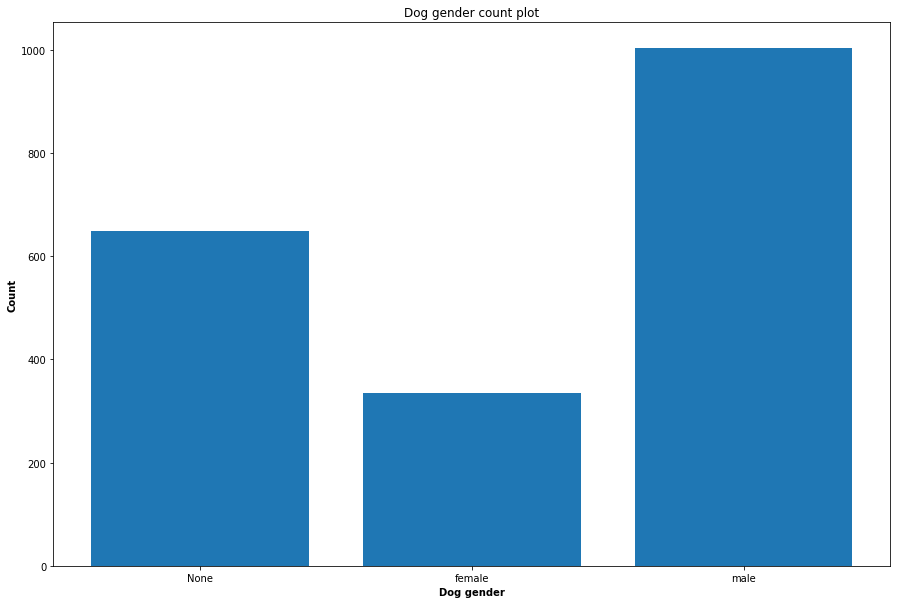

In [62]:
plt.subplots(figsize=(15, 10))
plt.bar([1, 2, 3], dog_gender, tick_label=['None',  'female', 'male'])
plt.title('Dog gender count plot')
plt.xlabel('Dog gender', weight='bold')
plt.ylabel('Count', weight='bold')
plt.savefig('most_pop_gender.png');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


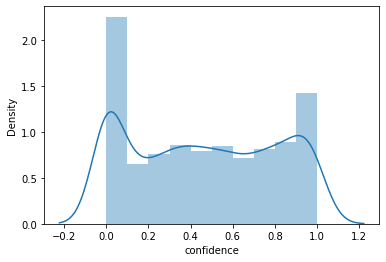

In [63]:
sns.distplot(df_twitter_enhanced_clean['confidence']);

In [64]:
dogs_prediction =df_twitter_enhanced_clean.groupby('prediction')['tweet_id'].count()
dogs_prediction

prediction
Afghan_hound                       3
Airedale                          12
American_Staffordshire_terrier    15
Appenzeller                        2
Australian_terrier                 2
                                  ..
toy_poodle                        50
toy_terrier                        3
vizsla                            13
whippet                           11
wire-haired_fox_terrier            2
Name: tweet_id, Length: 113, dtype: int64

In [65]:
dogs_prediction.astype(int)

prediction
Afghan_hound                       3
Airedale                          12
American_Staffordshire_terrier    15
Appenzeller                        2
Australian_terrier                 2
                                  ..
toy_poodle                        50
toy_terrier                        3
vizsla                            13
whippet                           11
wire-haired_fox_terrier            2
Name: tweet_id, Length: 113, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


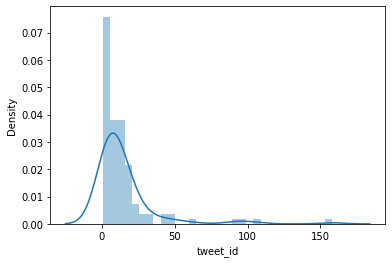

In [66]:
sns.distplot(dogs_prediction.astype(int));

In [ ]:
# !jupyter nbconvert <Notebook_name>.ipynb --to slides --post serve --no-input --no-prompt

/bin/bash: Notebook_name: No such file or directory
